In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET


## 1.Get Data


### 1.Authenticate

In [ ]:
# Step 1: Install Kaggle and Authenticate
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

### 2.Download Dataset from Kaggle

In [ ]:
# Step 2: Download Dataset from Kaggle
!kaggle datasets download -d andrewmvd/car-plate-detection
!unzip car-plate-detection.zip -d data/

### 3.Load random image for visualization

In [ ]:
# Step 3: Load a Random Image
images_path = 'data/images/'
annotations_path = 'data/annotations/'

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg') or f.endswith('.png')]
annotation_files = [f for f in os.listdir(annotations_path) if f.endswith('.xml')]

random_index = random.randint(0, len(image_files) - 1)
random_image_file = image_files[random_index]

image_base_name = os.path.splitext(random_image_file)[0]
random_annotation_file = f"{image_base_name}.xml"

In [ ]:
if random_annotation_file not in annotation_files:
    raise FileNotFoundError(f"Annotation file {random_annotation_file} not found for image {random_image_file}")

image_path = os.path.join(images_path, random_image_file)
annotation_path = os.path.join(annotations_path, random_annotation_file)



In [ ]:
# Step 4: Parse XML Annotation
tree = ET.parse(annotation_path)
root = tree.getroot()
bounding_boxes = []

In [ ]:
for obj in root.findall('object'):
    bbox = obj.find('bndbox')
    xmin = int(float(bbox.find('xmin').text))
    ymin = int(float(bbox.find('ymin').text))
    xmax = int(float(bbox.find('xmax').text))
    ymax = int(float(bbox.find('ymax').text))
    bounding_boxes.append((xmin, ymin, xmax, ymax))

In [ ]:
# Step 5: Draw Bounding Box on Image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for (xmin, ymin, xmax, ymax) in bounding_boxes:
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 255), 2)

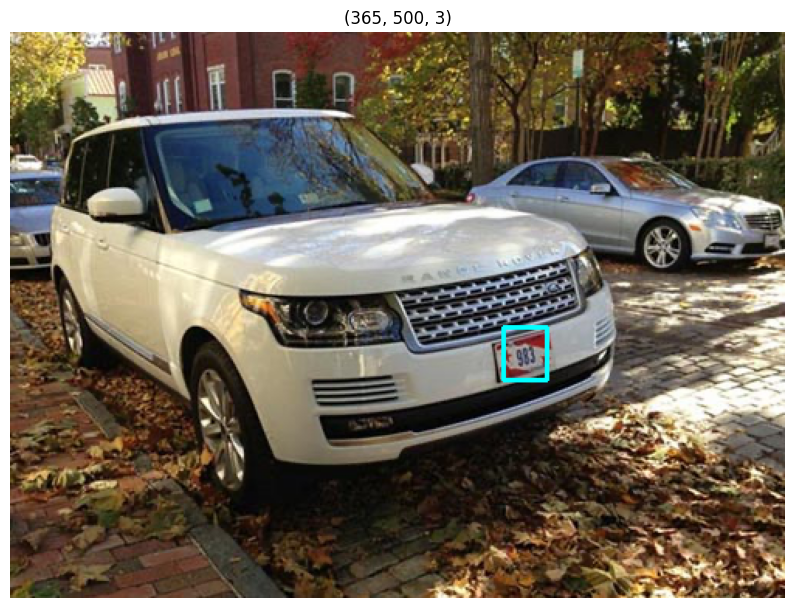

In [ ]:
# Step 6: Display the Image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title(image.shape)
plt.axis('off')
plt.show()

## 2.Get the helper functions

In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 1.Make Train and Test Folders with specific data

In [ ]:
import os
import shutil
import random
from tqdm.auto import tqdm

def create_train_test_split(data_folder, train_size_ratio=0.8):
    """
    Splits images and their corresponding annotation files into train and test folders.

    Parameters:
    - data_folder (str): Path to the folder containing 'images' and 'annotations' subfolders.
    - train_size_ratio (float): Proportion of data to use for training (default is 0.8).
    """

    # Define paths
    images_folder = os.path.join(data_folder, 'images')
    annotations_folder = os.path.join(data_folder, 'annotations')

    # Create train and test directories
    train_folder = os.path.join(data_folder, 'train')
    test_folder = os.path.join(data_folder, 'test')

    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # Get list of all image files
    image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Shuffle the image files to ensure randomness
    random.shuffle(image_files)

    # Calculate the number of training samples
    train_size = int(len(image_files) * train_size_ratio)

    # Split into train and test sets
    train_images = image_files[:train_size]
    test_images = image_files[train_size:]

    # Copy images and annotations to respective folders
    print(f"[INFO] Created {train_folder} for storing Train Images")
    for img in tqdm(train_images, desc= "Moving Train Images"):
        shutil.copy(os.path.join(images_folder, img), os.path.join(train_folder, img))
        annotation_file = img.rsplit('.', 1)[0] + '.xml'
        if os.path.exists(os.path.join(annotations_folder, annotation_file)):
            shutil.copy(os.path.join(annotations_folder, annotation_file), os.path.join(train_folder, annotation_file))


    print(f"\n[INFO] Created {test_folder} for storing Test Images")
    for img in tqdm(test_images, desc= "Moving Test Images"):
        shutil.copy(os.path.join(images_folder, img), os.path.join(test_folder, img))
        annotation_file = img.rsplit('.', 1)[0] + '.xml'
        if os.path.exists(os.path.join(annotations_folder, annotation_file)):
            shutil.copy(os.path.join(annotations_folder, annotation_file), os.path.join(test_folder, annotation_file))

# Example usage
create_train_test_split('data', train_size_ratio=0.8)

[INFO] Created data/train for storing Train Images


Moving Train Images:   0%|          | 0/346 [00:00<?, ?it/s]


[INFO] Created data/test for storing Test Images


Moving Test Images:   0%|          | 0/87 [00:00<?, ?it/s]